#  Road Traffic Severity Classification

### description

This data set is collected from Addis Ababa Sub-city police departments for master's research work.
The data set has been prepared from manual records of road traffic accidents of the year 2017-20. 
All the sensitive information has been excluded during data encoding and finally it has 32 features and 
12316 instances of the accident. Then it is preprocessed and for identification of major causes of the 
accident by analyzing it using different machine learning classification algorithms

In [1]:
#importing libraries

import pandas as pd


# task2: preprocessing


In [2]:
df=pd.read_csv('RTA Dataset.csv')

In [3]:
df["Pedestrian_movement"].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [4]:
l=[]
for i in df.columns:
    if df[i].isnull().sum()>1000:
        l.append(i)
     

In [5]:
l

['Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Work_of_casuality',
 'Fitness_of_casuality']

In [6]:
x=df[df['Service_year_of_vehicle'].isna()==False]

In [7]:
x['Service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

In [8]:
x=df[df['Defect_of_vehicle'].isna()==False]

In [9]:
x['Defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

In [10]:
df.loc[df['Defect_of_vehicle'].isna(),'Defect_of_vehicle']='No defect'

In [11]:
x=df[df['Work_of_casuality'].isna()==False]

In [12]:
x['Work_of_casuality'].value_counts()

Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: Work_of_casuality, dtype: int64

In [13]:
ind=(df['Owner_of_vehicle']=='Owner') &(df['Work_of_casuality']=="Driver")

In [14]:
df[ind].shape


(5003, 32)

In [15]:
df['Work_of_casuality']=df['Owner_of_vehicle'].apply(lambda x: 'Driver'if x is 'Owner' else 'Driver')

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\manis\AppData\Local\Temp\ipykernel_9344\3014065283.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  df['Work_of_casuality']=df['Owner_of_vehicle'].apply(lambda x: 'Driver'if x is 'Owner' else 'Driver')


In [16]:
df['Fitness_of_casuality'].value_counts()

Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: Fitness_of_casuality, dtype: int64

In [17]:
df['Fitness_of_casuality']=df['Fitness_of_casuality'].fillna('Normal')

In [18]:
l=[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        l.append(i)
     

In [19]:
l.remove('Service_year_of_vehicle')

In [20]:
x=df['Educational_level'].value_counts()

In [21]:
x.index[0]


'Junior high school'

In [22]:
for i in l:
    df[i]=df[i].fillna(df[i].value_counts()[0])

In [23]:
df=df.drop('Service_year_of_vehicle',axis=1)

In [24]:
df.info()
df['Road_surface_type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

array(['Asphalt roads', 'Earth roads', 11296,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

In [25]:
df['Time']=pd.to_datetime(df['Time'],format='%X')

In [26]:
df1=df.copy()

In [27]:
df1['Time']=df1['Time'].dt.hour

In [28]:
df1['Time']

0        17
1        17
2        17
3         1
4         1
         ..
12311    16
12312    18
12313    13
12314    13
12315    13
Name: Time, Length: 12316, dtype: int64

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  int64 
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [30]:
df['Day_of_week'].unique()

array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Saturday', 'Thursday',
       'Tuesday'], dtype=object)

In [31]:
diction={"Monday":1,"Tuesday":2,'Wednesday':3,'Thursday':4,"Friday":5,'Saturday':6,"Sunday":7}

In [32]:
df1['Day_of_week']=df1['Day_of_week'].map(diction)

In [33]:
l=df1['Age_band_of_driver'].value_counts().index

In [34]:
l

Index(['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18'], dtype='object')

In [35]:
x={i:j for i,j in zip(l,range(len(l)-1,-1,-1))}

In [36]:
x

{'18-30': 4, '31-50': 3, 'Over 51': 2, 'Unknown': 1, 'Under 18': 0}

In [37]:
categorical=[]
for i in df.columns:
    if df1[i].dtype=='O':
        categorical.append(i)
categorical

['Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

In [38]:
df1['Road_surface_type'].unique

<bound method Series.unique of 0        Asphalt roads
1        Asphalt roads
2        Asphalt roads
3          Earth roads
4        Asphalt roads
             ...      
12311    Asphalt roads
12312    Asphalt roads
12313    Asphalt roads
12314    Asphalt roads
12315    Asphalt roads
Name: Road_surface_type, Length: 12316, dtype: object>

In [39]:
for i in categorical:
    l=[]
    x={}
    l=df1[i].value_counts().index
    x={i:j for i,j in zip(l,range(len(l)-1,-1,-1))}

    df1[i]=df1[i].map(x)
    

In [40]:
df1.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,1,4,2,3,4,4,17,4,2,...,13,2,1,5,2,0,4,8,14,2
1,17,1,3,2,7,4,5,8,4,2,...,13,2,1,5,2,0,4,8,11,2
2,17,1,4,2,7,4,4,16,4,2,...,13,3,2,3,3,0,4,8,17,1
3,1,7,4,2,7,4,7,8,3,2,...,13,1,0,4,3,0,4,8,18,2
4,1,7,4,2,7,4,6,14,4,2,...,13,2,1,5,2,0,4,8,11,2


In [41]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [42]:
df2=df1.copy()

In [43]:
df2.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,1,4,2,3,4,4,17,4,2,...,13,2,1,5,2,0,4,8,14,2
1,17,1,3,2,7,4,5,8,4,2,...,13,2,1,5,2,0,4,8,11,2
2,17,1,4,2,7,4,4,16,4,2,...,13,3,2,3,3,0,4,8,17,1
3,1,7,4,2,7,4,7,8,3,2,...,13,1,0,4,3,0,4,8,18,2
4,1,7,4,2,7,4,6,14,4,2,...,13,2,1,5,2,0,4,8,11,2


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12316 non-null  int64
 1   Day_of_week                  12316 non-null  int64
 2   Age_band_of_driver           12316 non-null  int64
 3   Sex_of_driver                12316 non-null  int64
 4   Educational_level            12316 non-null  int64
 5   Vehicle_driver_relation      12316 non-null  int64
 6   Driving_experience           12316 non-null  int64
 7   Type_of_vehicle              12316 non-null  int64
 8   Owner_of_vehicle             12316 non-null  int64
 9   Defect_of_vehicle            12316 non-null  int64
 10  Area_accident_occured        12316 non-null  int64
 11  Lanes_or_Medians             12316 non-null  int64
 12  Road_allignment              12316 non-null  int64
 13  Types_of_Junction            12316 non-null  i

In [45]:
df3=df2.copy()

In [46]:
target=df3['Accident_severity']
x=df3.drop('Accident_severity',axis=1)

In [47]:
!pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

In [49]:
X_train_res, y_train_res = os.fit_resample(x,target)

In [50]:
print(X_train_res.shape, y_train_res.shape)

(31245, 30) (31245,)


In [51]:
X_train_res['Accident_severity']=y_train_res

In [52]:
X_train_res.shape

(31245, 31)

In [53]:
df3=X_train_res

In [54]:
df3.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,1,4,2,3,4,4,17,4,2,...,13,2,1,5,2,0,4,8,14,2
1,17,1,3,2,7,4,5,8,4,2,...,13,2,1,5,2,0,4,8,11,2
2,17,1,4,2,7,4,4,16,4,2,...,13,3,2,3,3,0,4,8,17,1
3,1,7,4,2,7,4,7,8,3,2,...,13,1,0,4,3,0,4,8,18,2
4,1,7,4,2,7,4,6,14,4,2,...,13,2,1,5,2,0,4,8,11,2


<AxesSubplot: title={'center': 'Count (target)'}>

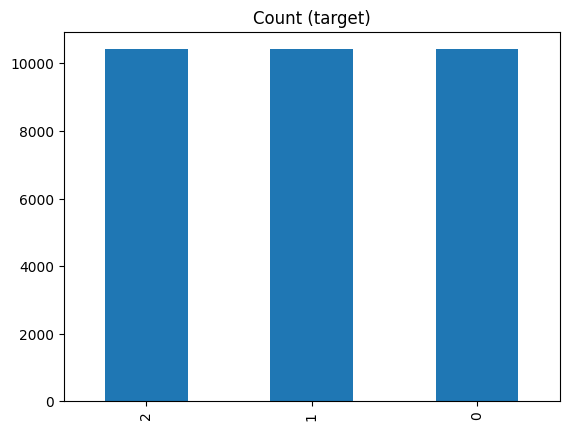

In [55]:
df3['Accident_severity'].value_counts().plot(kind='bar', title='Count (target)')

In [56]:
df3.shape

(31245, 31)

In [57]:
df3.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,1,4,2,3,4,4,17,4,2,...,13,2,1,5,2,0,4,8,14,2
1,17,1,3,2,7,4,5,8,4,2,...,13,2,1,5,2,0,4,8,11,2
2,17,1,4,2,7,4,4,16,4,2,...,13,3,2,3,3,0,4,8,17,1
3,1,7,4,2,7,4,7,8,3,2,...,13,1,0,4,3,0,4,8,18,2
4,1,7,4,2,7,4,6,14,4,2,...,13,2,1,5,2,0,4,8,11,2


In [58]:
numerical=['Number_of_vehicles_involved', 'Number_of_casualties'] 

In [59]:
from matplotlib import pyplot as plt

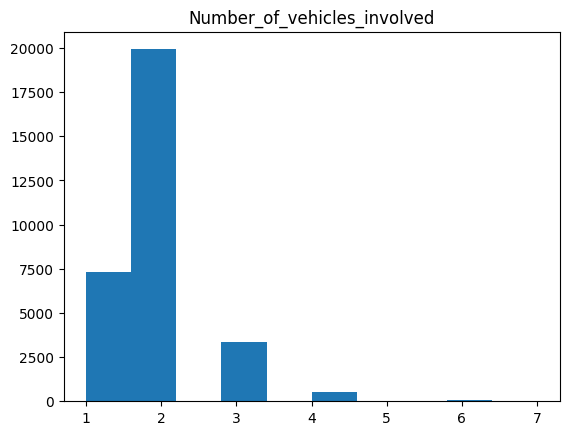

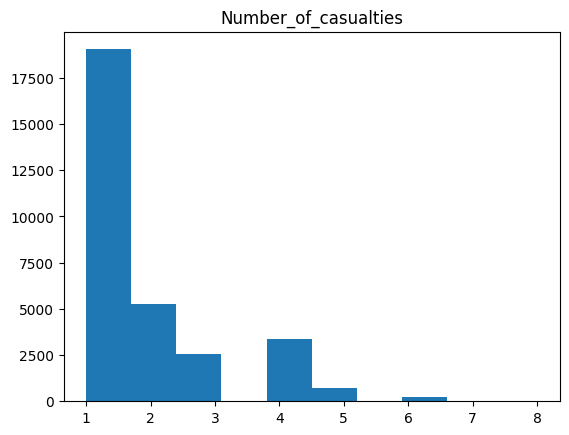

In [60]:
for i in numerical:
    plt.hist(df3[i])
    plt.title(i)
    plt.show()

In [61]:
import numpy as np
df3['log_number_of_vehicles']=np.log(df3['Number_of_vehicles_involved'])

(array([ 7330.,     0.,     0., 19927.,     0.,  3331.,     0.,   553.,
            0.,   104.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <BarContainer object of 10 artists>)

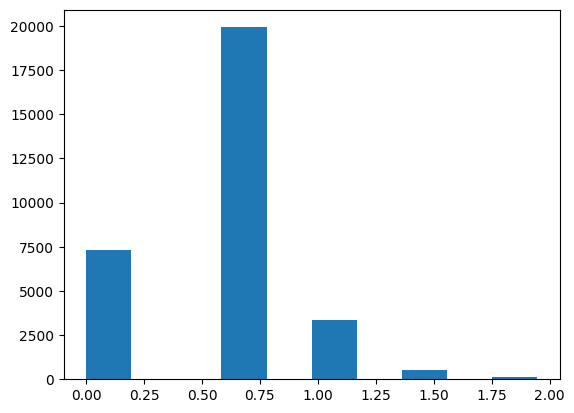

In [62]:
plt.hist(df3['log_number_of_vehicles'])

In [63]:
df3.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,log_number_of_vehicles
0,17,1,4,2,3,4,4,17,4,2,...,2,1,5,2,0,4,8,14,2,0.693147
1,17,1,3,2,7,4,5,8,4,2,...,2,1,5,2,0,4,8,11,2,0.693147
2,17,1,4,2,7,4,4,16,4,2,...,3,2,3,3,0,4,8,17,1,0.693147
3,1,7,4,2,7,4,7,8,3,2,...,1,0,4,3,0,4,8,18,2,0.693147
4,1,7,4,2,7,4,6,14,4,2,...,2,1,5,2,0,4,8,11,2,0.693147


In [64]:
df4=df3.drop(['Accident_severity' ,'Number_of_vehicles_involved'],axis=1)

In [65]:
df4.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,log_number_of_vehicles
0,17,1,4,2,3,4,4,17,4,2,...,13,2,1,5,2,0,4,8,14,0.693147
1,17,1,3,2,7,4,5,8,4,2,...,13,2,1,5,2,0,4,8,11,0.693147
2,17,1,4,2,7,4,4,16,4,2,...,13,3,2,3,3,0,4,8,17,0.693147
3,1,7,4,2,7,4,7,8,3,2,...,13,1,0,4,3,0,4,8,18,0.693147
4,1,7,4,2,7,4,6,14,4,2,...,13,2,1,5,2,0,4,8,11,0.693147


In [66]:
target=df3['Accident_severity']

In [67]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df4,target,test_size=0.33)

# feature selection

In [68]:
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(k='all')
fs.fit(xtrain,ytrain)
xtrain_fs=fs.transform(xtrain)
xtest_fs=fs.transform(xtest)

E:\anacondafiles\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
E:\anacondafiles\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [69]:
xtrain.shape

(20934, 30)

In [70]:
ytrain.shape

(20934,)

In [71]:

l=[]
for i in range(len(fs.scores_)):
    print("feature {}".format(i),fs.scores_[i])
    if fs.scores_[i] >30:
     
        l.append(df4.columns[i])

feature 0 67.37290986371531
feature 1 321.7274773142671
feature 2 71.76665413506926
feature 3 42.1599004774444
feature 4 0.9553410502565697
feature 5 22.92440055230783
feature 6 34.40597731125789
feature 7 6.936190544936633
feature 8 3.7814872836829663
feature 9 29.934996881846274
feature 10 22.449690301907015
feature 11 1.6385488106809973
feature 12 1.652044540535734
feature 13 21.389702801330255
feature 14 30.596749495097953
feature 15 2.9093199039409425
feature 16 223.3066145472437
feature 17 146.99362437988296
feature 18 2.8284259525813815
feature 19 1161.8737934010624
feature 20 52.5558516232268
feature 21 15.492764162183251
feature 22 67.20066770307008
feature 23 16.35013131484779
feature 24 23.355584054848315
feature 25 nan
feature 26 1.0664125345645525
feature 27 0.5089706113840462
feature 28 27.671205935443368
feature 29 305.81334582109605


In [72]:
df4.columns[4]

'Educational_level'

In [73]:
 df4.columns[0]

'Time'

In [74]:
l=['Age_band_of_driver','Sex_of_driver',
  'Weather_conditions',"Time",'Road_surface_type']

In [75]:
df5=df4[l]

In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df5,target,test_size=0.33)

# modeling

#### random forest 

In [77]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [78]:
xtrain

,Age_band_of_driver,Sex_of_driver,Weather_conditions,Time,Road_surface_type
31018,4,2,8,7,5
17066,3,2,8,15,5
25268,2,2,8,17,3
7443,3,2,8,16,5
22825,4,2,8,15,5
...,...,...,...,...,...
6555,2,2,8,18,5
23337,0,2,7,22,5
21747,3,2,8,11,4
20064,2,2,8,12,5


In [79]:
model.score(xtest,ytest)

0.6143923964697895

# hyper parameter tuning

#### kfold cross validataion

In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(),df5,target,cv=5)



array([0.61145783, 0.60409666, 0.62409986, 0.59865578, 0.6168987 ])

In [81]:
for i in ["auto", "sqrt", "log2"]:
    display(cross_val_score(RandomForestClassifier(max_features=i),df5,target,cv=3))

array([0.59846375, 0.60758521, 0.60470475])

array([0.5987518 , 0.60614498, 0.60470475])

array([0.59990398, 0.60710514, 0.60633701])

In [82]:
from sklearn.model_selection import GridSearchCV
grd=GridSearchCV(RandomForestClassifier(),{'max_features': ["auto", "sqrt", "log2"]},cv=5,return_train_score=False)

In [83]:
grd.fit(df5,target)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [84]:
pd.DataFrame(grd.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.009395,0.199178,0.102236,0.011276,auto,{'max_features': 'auto'},0.611618,0.604097,0.62346,0.598016,0.616899,0.610818,0.009017,3
1,0.853813,0.024721,0.088145,0.006730,sqrt,{'max_features': 'sqrt'},0.610658,0.605697,0.62586,0.597216,0.616419,0.611170,0.009678,1
2,0.972731,0.101601,0.113093,0.016161,log2,{'max_features': 'log2'},0.609698,0.605537,0.62362,0.599136,0.616739,0.610946,0.008538,2


In [85]:
model=RandomForestClassifier(max_features='log2')
model.fit(xtrain,ytrain)

RandomForestClassifier(max_features='log2')

In [86]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(model.predict(xtest),ytest)

In [87]:
matrix

array([[2943,  834,  895],
       [ 282, 1850,  977],
       [ 244,  744, 1542]], dtype=int64)

In [88]:
li=df['Accident_severity'].value_counts().index

<AxesSubplot: >

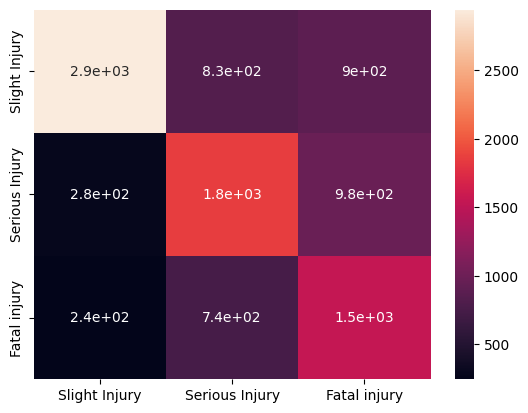

In [89]:
import seaborn as sns
sns.heatmap(matrix,annot=True,xticklabels=li,yticklabels=li)

# f1-score

In [90]:
from sklearn.metrics import f1_score
score=f1_score(model.predict(xtest),ytest,average=None)
score

array([0.723007  , 0.56600887, 0.51884253])

In [91]:
xtest.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Weather_conditions', 'Time',
       'Road_surface_type'],
      dtype='object')

In [92]:
import joblib

In [93]:
joblib.dump(model,'model.joblib')

['model.joblib']

In [94]:
l=[1,2,3,3,4,5]
m=[1,2,3,4,4,5]

In [95]:
dict(zip(l,m))

{1: 1, 2: 2, 3: 4, 4: 4, 5: 5}

In [96]:
import numpy as np


In [99]:
a=np.arange(5)
a

array([0, 1, 2, 3, 4])

In [98]:
list(1+a)

[1, 2, 3, 4, 5]

In [107]:
age_of_driver=['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18']
def ordinal_encoder(input_val,feats):
    len1=len(feats)
    feat_val=list(1+np.arange(len1))
    print(feat_val)
    feat_key=feats
    feat_dict=dict(zip(feat_key,feat_val))
    print(type(feat_dict['18-30']))
    value=feat_dict[input_val]
    return value
ordinal_encoder('18-30',age_of_driver)

[1, 2, 3, 4, 5]
<class 'numpy.int32'>


1

In [105]:
type(feat_dict['18-30'])

NameError: name 'feat_dict' is not defined